In [3]:
import numpy as np

Ejercicio I-A

Funcion matrix_multiplication

In [16]:
def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray)-> np.ndarray:
    if m_1.shape[1] != m_2.shape[0]:
        raise Exception("Matrices are not compatible")
    
    n = m_1.shape[1] # elements in the column/row
    m_result = np.zeros([m_1.shape[0], m_2.shape[1]])

    for row in range(m_1.shape[0]):
        for column in range(m_2.shape[1]):
            for k in range(n):
                m_result[row][column] += m_1[row][k] * m_2[k][column]
    
    return m_result

Timing matrix multiplication:

In [54]:
import time

l_timings = []
for i in range(10, 21):
    dim = 10 + i**2
    m = np.random.uniform(0, 1, [dim, dim])
    n = np.random.uniform(0, 1, [dim, dim])
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, n)
    timings_dot = %timeit -o -n 10 -r 5 -q m.dot(n)
    l_timings.append([dim, timings.best, timings_dot.best])

In [45]:
l_timings

[[110, 0.9452951323999969, 5.525719998331624e-05],
 [131, 1.7209529170000224, 7.246830000440241e-05],
 [154, 2.71034909519999, 0.00011140519995933573],
 [179, 3.83125650449997, 0.00016790800000308082],
 [206, 6.365131496100003, 0.00018973810001625678]]

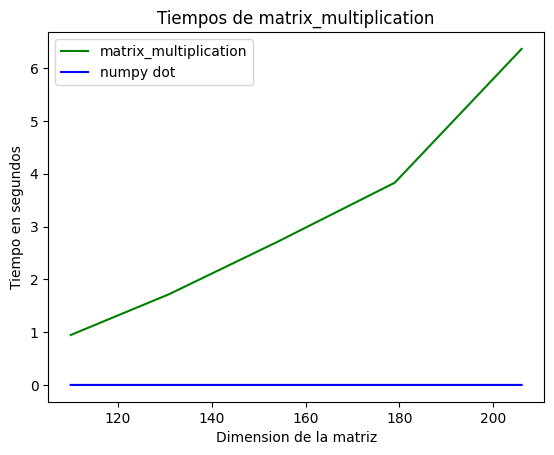

In [42]:
#Line chart
from matplotlib import pyplot as plt

dimensions = [i[0] for i in l_timings] 
time_matrix_multiplication = [i[1] for i in l_timings] 
time_dot = [i[2] for i in l_timings]

#Crear un gráfico de líneas
plt.plot(dimensions, time_matrix_multiplication, color= 'green', marker='none', linestyle = 'solid', label="matrix_multiplication")
plt.plot(dimensions, time_dot, color= 'blue', marker='none', linestyle = 'solid', label="numpy dot")

#Añadir un título al gráfico
plt.title("Tiempos de Multiplicacion de matrices")

#Añadir etiqueta al eje x y y (x-axis y y-axis)
plt.ylabel("Tiempo en segundos")
plt.xlabel("Dimension de la matriz")

#Mostrar
plt.legend(loc="upper left")
plt.show()

In [47]:
from scipy.optimize import curve_fit
def tofit(x, a, b):
    #cambiar f por el codigo Python de la funcion del coste teorico
    return a * x**3 + b

x = np.array(l_timings)[: , 0]
#o (mas "pythonico"?) x = a_timings.T[0].T
y = np.array(l_timings)[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)

TypeError: list indices must be integers or slices, not tuple

In [53]:
m = np.random.uniform(0, 1, (400,400))
n = np.random.uniform(0, 1, (400,400))

m.dot(n)

array([[103.67517945, 101.43971647,  99.46490709, ..., 106.53618718,
        100.18679927, 106.35319897],
       [102.93656834, 104.22482799,  98.99636266, ..., 106.40875331,
         96.65480452, 106.04983946],
       [103.94302742, 102.96274185, 100.53956561, ..., 104.43302782,
         97.81372789, 107.36820297],
       ...,
       [102.98548324,  98.94545303,  98.30302578, ..., 103.55825881,
        100.32600635, 104.27317968],
       [104.08889828, 101.80013627,  99.74599454, ..., 101.60308976,
         98.54807131, 109.15244966],
       [102.10265062, 103.61705876,  99.94699503, ..., 105.12691794,
         95.72419846, 105.87688517]])